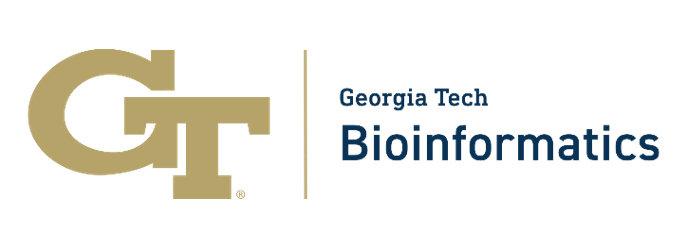

<div class="alert alert-block alert-info">
    <h1>BIOL 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>Nilavrah Sensarma (nsensarma3@gatech.edu)</p>
    <p>Valli Sree Lasya Pasumarthy (vpasumarthy3@gatech.edu)

</p>
</div>

<div class="alert alert-block alert-warning">
    <h2>Project 3 (Read Mapping & Variant Calling) starter notebook</h2>
    <h3>Deadline: 11:59PM, September 29th, 2025</h3>
</div>

### Rerun the analysis as demonstrated in the lab sessions


---

<div class="alert alert-block alert-warning">
    <h2>Part 1 - Read Mapping</h2>
    <h2> Total Points: 5+15+15 = 35</h2>
</div>

# **1.1 Getting read for read alignment**
### *Total Questions: 5*
### *Total Points: 0.5+0.5+1+2+1 = 5*


---

<div class="alert alert-block alert-warning">
    <h3>1.1.1 Do you have the post-QCed fastq file from the assigned 1000 Genomes individual</h3>
    <p>We will start from where we left off in Project #1. We want to make sure that we are using the correct QCed fastq files.</p>
</div>

In [2]:
##Run "ls -lh" here to show the two fastq files.
!ls -lh ~/scratch/Archived_Projects/DataAccess_SRR715907/Trimming/


total 3.9G
-rw-r--r--. 1 gmyers30 gtperson 2.0G Sep 16 23:12 SRR715907_1.Trimmed.fastq.gz
-rw-r--r--. 1 gmyers30 gtperson 2.0G Sep 16 23:12 SRR715907_2.Trimmed.fastq.gz


<div class="alert alert-block alert-warning">
    <h3>1.1.2 Download the correct reference genome for alignment step</h3>
    <p>Please locate and donwload the human reference genome fasta file in build GRCh38</p>
</div>

In [4]:
#Where does this file come from? Give the website link (FTP?) or explain how you downloaed this file.
###https://hgdownload.soe.ucsc.edu/goldenPath/hg38/chromosomes/

#Also run "ls -lh" here to see the size and location of your reference file.
!wget https://hgdownload.cse.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz
!ls -lh


--2025-09-28 22:37:02--  https://hgdownload.cse.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz
Resolving hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)|128.114.119.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 983659424 (938M) [application/x-gzip]
Saving to: ‘hg38.fa.gz’

hg38.fa.gz          100%[===================>] 938.09M  62.3MB/s    in 15s     

2025-09-28 22:37:18 (60.7 MB/s) - ‘hg38.fa.gz’ saved [983659424/983659424]

total 951M
-rw-r--r--. 1 gmyers30 gtperson 122K Sep 26 15:46 'Project2-ReadMapping&VariantCalling.ipynb'
-rw-r--r--. 1 gmyers30 gtperson 151K Sep 28 22:36 'Project2-ReadMapping&VariantCalling_Gillian.ipynb'
drwxr-xr-x. 2 gmyers30 gtperson 4.0K Sep 28 13:31  ReadAlignment
-rw-r--r--. 1 gmyers30 gtperson    0 Sep 28 13:32  SRR715907.mpileup
-rw-r--r--. 1 gmyers30 gtperson    0 Sep 28 16:18  VarScan.jar
drwxr-xr-x. 2 gmyers30 gtperson 4.0K Sep 28 17:37  

In [ ]:
#Moving to more specific folder
!mkdir -p ~/scratch/Current_Projects/Project_2/ReadAlignment/
!mv hg38.fa.gz ~/scratch/Current_Projects/Project_2/ReadAlignment/
!ls -lh ~/scratch/Current_Projects/Project_2/ReadAlignment/

<div class="alert alert-block alert-warning">
    <h3>1.1.3 Find out about your reference genome file.</h3>
    <p>Does your reference fasta file have more information that just ACGT nucleotides? Please check if your fastq sequence have Ns or small/upper case ACGT nnucleotides.</p>
</div>

In [ ]:
#Just glance over the fasta file. There is no need to run a script for this. 
#Write in one sentence if you see more than just upper case ACGT nucleotides.
####yes there are some smaller gt and a nucleotides as well as N

<div class="alert alert-block alert-warning">
    <h3>1.1.4 Using 1-3 lines, explain what upper case ACGT, lower case ACGT, and NNNs mean in your reference fasta file.</h3>
    <p>Hint: check readme files.</p>
</div>

In [ ]:
#No need to exceed 3 lines for this question.
#couldnt access the read me files so I used this to get help from professionals and not AI: https://bioinformatics.stackexchange.com/questions/225/uppercase-vs-lowercase-letters-in-reference-genome

#The normal ACTG are nucleotides that are unambigious, N is for "hard masking" or regions of the genome that could not be assembled
# n is "soft masking" and are for highly repetitive sequences


<div class="alert alert-block alert-warning">
    <h3>1.1.5 Select a tool for read alignment.</h3>
    <p>We have demonstrated bwa and minimap2 in the class. Use either of the tools for this section.</p>
</div>

In [5]:
#Run your tool here to just make sure bash does not say "not found"
#minimap2 twin
!minimap2

Usage: minimap2 [options] <target.fa>|<target.idx> [query.fa] [...]
Options:
  Indexing:
    -H           use homopolymer-compressed k-mer (preferrable for PacBio)
    -k INT       k-mer size (no larger than 28) [15]
    -w INT       minimizer window size [10]
    -I NUM       split index for every ~NUM input bases [8G]
    -d FILE      dump index to FILE []
  Mapping:
    -f FLOAT     filter out top FLOAT fraction of repetitive minimizers [0.0002]
    -g NUM       stop chain enlongation if there are no minimizers in INT-bp [5000]
    -G NUM       max intron length (effective with -xsplice; changing -r) [200k]
    -F NUM       max fragment length (effective with -xsr or in the fragment mode) [800]
    -r NUM[,NUM] chaining/alignment bandwidth and long-join bandwidth [500,20000]
    -n INT       minimal number of minimizers on a chain [3]
    -m INT       minimal chaining score (matching bases minus log gap penalty) [40]
    -X           skip self and dual mappings (for the all-vs-all m

# **1.2 Read alignment**
### *Total Questions: 4*
### *Total Points: 2+3+2+8= 15*

---

<div class="alert alert-block alert-warning">
    <h3>1.2.1 Steps before mapping</h3>
    <p>You already have a fasta file, but sometimes alignment tools do not accept fasta files directly. Please read your aligners documentation and run all the preliminary steps require to run the mapping command from your aligner.</p>
</div>

<div class="alert alert-block alert-info">
    <p>Preliminary commands go in the cells below. Please use appropriate comments and markdown texts to explain what your command is doing.</p>
</div>

In [6]:
!ls -lh ~/scratch/Current_Projects/Project_2/ReadAlignment/
#cheking to see if its in the right location again and size of files

!gunzip ~/scratch/Current_Projects/Project_2/ReadAlignment/hg38.fa.gz
#unzipping files(gz) into the fa files and placing them in directory


total 29G
-rw-r--r--. 1 gmyers30 gtperson  19G Sep 26 13:52 SRR715907.Minimap.sam
-rw-r--r--. 1 gmyers30 gtperson 3.1G Jan 16  2014 hg38.fa
-rw-r--r--. 1 gmyers30 gtperson  19K Sep 28 13:31 hg38.fa.fai
-rw-r--r--. 1 gmyers30 gtperson 7.0G Sep 26 13:26 hg38.mmi
gzip: /home/hice1/gmyers30/scratch/Current_Projects/Project_2/ReadAlignment/hg38.fa.gz: No such file or directory


In [7]:
!ls -lh ~/scratch/Current_Projects/Project_2/ReadAlignment/
#showing first 10 lines of the file
!head ~/scratch/Current_Projects/Project_2/ReadAlignment/hg38.fa
#-n20000 = grabs first 20,000 lines of the file
# | tail = from those 20,000 lines show the last 10
#essentially to check formatting + quality without showing the entire genome
!head ~/scratch/Current_Projects/Project_2/ReadAlignment/hg38.fa -n20000 | tail




total 29G
-rw-r--r--. 1 gmyers30 gtperson  19G Sep 26 13:52 SRR715907.Minimap.sam
-rw-r--r--. 1 gmyers30 gtperson 3.1G Jan 16  2014 hg38.fa
-rw-r--r--. 1 gmyers30 gtperson  19K Sep 28 13:31 hg38.fa.fai
-rw-r--r--. 1 gmyers30 gtperson 7.0G Sep 26 13:26 hg38.mmi
>chr1
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
AGGAGAGGTCGGTGCCGGGTCCCGGGGGTcccgcgccctccccccgcctc
caagccgccgccgcccgcgccTCACCCGTCACCTGCACGCGACGCAGGCT
CCGCAGGTGTCTCACGGTCATCTCCAGGATGTCCGCCTTCTCCAGCTTCG
AGTGGCGGGAGCTCTGGGGGCGGGGATAGGCGGGAGGTCCAGGTCAGCTG
CGACCCAGACTCCGGGTCTCGGGCCTTCGCCCCCGACTTACCTCTTTTCT
GAGGGCGTCCAGGATGAGG

In [8]:
#Run"ls -lh" to show what additional files were created in addition to your original fasta files.

!ls -lh ~/scratch/Current_Projects/Project_2/ReadAlignment/

total 29G
-rw-r--r--. 1 gmyers30 gtperson  19G Sep 26 13:52 SRR715907.Minimap.sam
-rw-r--r--. 1 gmyers30 gtperson 3.1G Jan 16  2014 hg38.fa
-rw-r--r--. 1 gmyers30 gtperson  19K Sep 28 13:31 hg38.fa.fai
-rw-r--r--. 1 gmyers30 gtperson 7.0G Sep 26 13:26 hg38.mmi


<div class="alert alert-block alert-warning">
    <h3>1.2.2 Run mapping.</h3>
    <p>This should be one or two lines of code but it's important to understand what the options are doing.</p>
</div>

In [1]:
#Alignment w/minimap
!minimap2 -d ~/scratch/Current_Projects/Project_2/ReadAlignment/hg38.mmi ~/scratch/Current_Projects/Project_2/ReadAlignment/hg38.fa    
!ls -lh ~/scratch/Current_Projects/Project_2/ReadAlignment/

[M::mm_idx_gen::61.502*1.59] collected minimizers
[M::mm_idx_gen::85.786*1.68] sorted minimizers
[M::main::96.161*1.61] loaded/built the index for 455 target sequence(s)
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 455
[M::mm_idx_stat::97.386*1.60] distinct minimizers: 100202295 (37.96% are singletons); average occurrences: 5.732; average spacing: 5.587; total length: 3209286105
[M::main] Version: 2.26-r1175
[M::main] CMD: minimap2 -d /home/hice1/gmyers30/scratch/Current_Projects/Project_2/ReadAlignment/hg38.mmi /home/hice1/gmyers30/scratch/Current_Projects/Project_2/ReadAlignment/hg38.fa
[M::main] Real time: 97.569 sec; CPU: 155.991 sec; Peak RSS: 11.978 GB
total 11G
-rw-r--r--. 1 gmyers30 gtperson 3.1G Jan 16  2014 hg38.fa
-rw-r--r--. 1 gmyers30 gtperson 7.0G Sep 26 13:26 hg38.mmi


In [4]:
!minimap2 -c -a ~/scratch/Current_Projects/Project_2/ReadAlignment/hg38.mmi ~/scratch/Archived_Projects/DataAccess_SRR715907/Trimming/SRR715907_1.Trimmed.fastq.gz ~/scratch/Archived_Projects/DataAccess_SRR715907/Trimming/SRR715907_2.Trimmed.fastq.gz > ~/scratch/Current_Projects/Project_2/ReadAlignment/SRR715907.Minimap.sam  


[M::main::8.614*0.99] loaded/built the index for 455 target sequence(s)
[M::mm_mapopt_update::10.309*0.99] mid_occ = 728
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 455
[M::mm_idx_stat::11.527*0.99] distinct minimizers: 100202295 (37.96% are singletons); average occurrences: 5.732; average spacing: 5.587; total length: 3209286105
[M::worker_pipeline::198.752*1.86] mapped 6759446 sequences
[M::worker_pipeline::356.300*1.92] mapped 6759522 sequences
[M::worker_pipeline::514.579*1.94] mapped 6759483 sequences
[M::worker_pipeline::670.774*1.95] mapped 6759512 sequences
[M::worker_pipeline::705.596*1.94] mapped 2162928 sequences
[M::worker_pipeline::890.977*1.94] mapped 6759446 sequences
[M::worker_pipeline::1049.168*1.94] mapped 6759522 sequences
[M::worker_pipeline::1209.191*1.95] mapped 6759483 sequences
[M::worker_pipeline::1362.752*1.95] mapped 6759512 sequences
[M::worker_pipeline::1397.109*1.95] mapped 2162928 sequences
[M::main] Version: 2.26-r1175
[M::main] CMD: mini

using minimap, we used -a and -c for input/output. -a is to output in the SAM file, while -c was used to output the CIGAR string for the reads to a PAF. 

<div class="alert alert-block alert-warning">
    <h3>1.2.3 Post alignment evaluation.</h3>
    <p>How many lines does your SAM file have?</p>
</div>

In [4]:
#Checking output file
!head ~/scratch/Current_Projects/Project_2/ReadAlignment/SRR715907.Minimap.sam
!wc ~/scratch/Current_Projects/Project_2/ReadAlignment/SRR715907.Minimap.sam

@HD	VN:1.6	SO:unsorted	GO:query
@SQ	SN:chr1	LN:248956422
@SQ	SN:chr10	LN:133797422
@SQ	SN:chr11	LN:135086622
@SQ	SN:chr11_KI270721v1_random	LN:100316
@SQ	SN:chr12	LN:133275309
@SQ	SN:chr13	LN:114364328
@SQ	SN:chr14	LN:107043718
@SQ	SN:chr14_GL000009v2_random	LN:201709
@SQ	SN:chr14_GL000225v1_random	LN:211173
   86455193  1777742100 19560781883 /home/hice1/gmyers30/scratch/Current_Projects/Project_2/ReadAlignment/SRR715907.Minimap.sam


<div class="alert alert-block alert-warning">
    <h3>1.2.4 Look at the 7th read that maps successfully in your SAM file and answer the following questions.                     (4*2 = 8 points)</h3>
    <p>1. What chromosome does it align to?</p>
    <p>2. What is the CIGAR string for this read? Explain the CIGAR string in detail.</p>
    <p>3. Does this read have a paired read which also aligns successfully?</p>
    <p>4. If the paired read aligns successfully, what does the CIGAR string for this read convey?</p>
</div>

In [2]:
!awk '!/^@/ && and($2, 4) == 0 {count++; if (count == 7) print;}' ~/scratch/Current_Projects/Project_2/ReadAlignment/SRR715907.Minimap.sam

SRR715907.10	16	chr1	53090753	56	74M	*	0	0	TCGATGTGGTTGTTCTCCAGCAGGCACTTGAAGGTGATGGGCAGTGTGGCTGAGCTACGGTTAGAGGGGCCGGT	DDDDDDDBDC>DDDDDDDDEEEEEEFFFFFFHHHHHJJJJJJJIGJJJJJJJJJJJJJJJJIJJJJJJJJJJJH	NM:i:0	ms:i:148	AS:i:148	nn:i:0	tp:A:P	cm:i:11	s1:i:73	s2:i:0	de:f:0	rl:i:0


1. chromosome 1
2. 74 M = 74 bases aligned, no insertions, deletions, etc.
3. Flag field is the second column, 16, so it is single end and aligned successfully. However, this read is not paired so we cannot determine if it mapped successfully.
4. We cannot determine this information yet.

# **1.3 Read alignment evaluation**
### *Total Questions: 5*
### *Total Points: 2+2+3+2+6 = 15*


---

<div class="alert alert-block alert-warning">
    <h3>1.3.1 Samtools is a classic bioinformatics tools.</h3>
    <p>Check if you have samtools installed on your environment.</p>
</div>

In [2]:
!SAMstats --help

usage: SAMstats [-h] --sorted_sam_file SORTED_SAM_FILE [--outf OUTF]
                [--chunk_size CHUNK_SIZE]

Compute SAM file mapping statistics for a SAM file sorted by read name

options:
  -h, --help            show this help message and exit
  --sorted_sam_file SORTED_SAM_FILE
                        Input SAM file. Use '-' if input is being piped from
                        stdin. File must be sorted by read name.
  --outf OUTF           Output file name to store alignment statistics. The
                        statistics will be printed to stdout if no file is
                        provided
  --chunk_size CHUNK_SIZE
                        Number of lines to read a time from sortedSamFile


<div class="alert alert-block alert-warning">
    <h3>1.3.2 Is your SAM file sorted by coordinates?</h3>
    <p>SAM or BAM (which we will create later) can be sorted by the read name or read coordinate. Look at your SAM file and see if you can run a Samtools command to find out if your file is sorted. (Hint: Google your question)</p>
</div>

In [1]:
#moving file
!mkdir -p ~/scratch/Current_Projects/Project_2/VariantCalling/
!cp ~/scratch/Current_Projects/Project_2/ReadAlignment/hg38.fa* ~/scratch/Current_Projects/Project_2/VariantCalling/
!cp ~/scratch/Current_Projects/Project_2/ReadAlignment/SRR715907.Minimap.sam ~/scratch/Current_Projects/Project_2/VariantCalling/

!ls -lh ~/scratch/Current_Projects/Project_2/VariantCalling/

total 22G
-rw-r--r--. 1 gmyers30 gtperson  19G Sep 28 13:31 SRR715907.Minimap.sam
-rw-r--r--. 1 gmyers30 gtperson 3.1G Sep 28 13:31 hg38.fa


In [3]:
#IS the file sorted? NO IT IS NOT SORTED
!samtools mpileup -f ~/scratch/Current_Projects/Project_2/ReadAlignment/hg38.fa ~/scratch/Current_Projects/Project_2/ReadAlignment/SRR715907.Minimap.sam > SRR715907.mpileup


[mpileup] 1 samples in 1 input files
[E::bam_plp_push] The input is not sorted (chromosomes out of order)
samtools mpileup: error reading from input file


In [6]:
#Beginning to sort the file (REQUIRED FOR NEXT STEP)
!samtools sort -o ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.Minimap.sorted.sam ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.Minimap.sam

[bam_sort_core] merging from 24 files and 1 in-memory blocks...


In [8]:
#mpileup
!samtools mpileup -f ~/scratch/Current_Projects/Project_2/VariantCalling/hg38.fa ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.Minimap.sorted.sam > ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.mpileup

[mpileup] 1 samples in 1 input files


<div class="alert alert-block alert-warning">
    <h3>1.3.3 Sort your SAM file?</h3>
    <p>Sort your SAM file by genomic coordinates,</p>
    <p>When you run this command, what is the output format of your result file?</p>
    <h4>Tweak samtools and change your sorted SAM file's output to SAM. (Hint: You should be able to read the file using simple cat or less)</h4>
</div>

In [9]:
#Head your sorted SAM file here. Show the first 5 lines.
!head -n 5 ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.Minimap.sorted.sam

@HD	VN:1.6	SO:coordinate
@SQ	SN:chr1	LN:248956422
@SQ	SN:chr10	LN:133797422
@SQ	SN:chr11	LN:135086622
@SQ	SN:chr11_KI270721v1_random	LN:100316


<div class="alert alert-block alert-warning">
    <h3>1.3.4 Convert your SAM file to a BAM file.</h3>
    <p>This should be a single one line command.</p>
</div>

In [11]:
#Write the command run "ls -lh" to show the size and location of the file.

!samtools view -bS ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.Minimap.sorted.sam > ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.bam
!ls -lh ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.bam

-rw-r--r--. 1 gmyers30 gtperson 3.3G Sep 28 14:08 /home/hice1/gmyers30/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.bam


<div class="alert alert-block alert-warning">
    <h3>1.3.5 Statistics of your SAM file.</h3>
    <p>1.How many total raw sequences does your SAM file have?</p>
    <p>2.How many total reads are mapped in your SAM file?</p>
</div>

In [13]:
!samtools view -c ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.Minimap.sorted.sam

86454736


In [14]:
!samtools view -c -F 4 ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.Minimap.sorted.sam

85370706


---

<div class="alert alert-block alert-warning">
    <h2>Part 2 - Variant Calling</h2>
    <h2> Total points: 12+15+8 = 35</h2>
</div>

# **2.1 Getting ready for variant calling**
### *Total Questions: 6*
### *Total Points: 1+1+3+2+2+3 = 12*


---

<div class="alert alert-block alert-warning">
    <h3>2.1.1 Check your SAM file (you can also convert your SAM file to a BAM file and do the exercises on that)</h3>
    <p><b>(i)</b> We will start from where we left off in Project #2. We want to make sure that we are using the corrent SAM file.</p>
    <p><b>(ii)</b> Show that your SAM file is sorted</p>
    
</div>

In [23]:
#Check you SAM file here.
!ls -lh ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.Minimap.sorted.sam
!ls -lh

-rw-r--r--. 1 gmyers30 gtperson 19G Sep 28 13:45 /home/hice1/gmyers30/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.Minimap.sorted.sam
total 196K
-rw-r--r--. 1 gmyers30 gtperson 122K Sep 26 15:46 'Project2-ReadMapping&VariantCalling.ipynb'
-rw-r--r--. 1 gmyers30 gtperson  64K Sep 28 14:35 'Project2-ReadMapping&VariantCalling_Gillian.ipynb'
drwxr-xr-x. 2 gmyers30 gtperson 4.0K Sep 28 13:31  ReadAlignment
-rw-r--r--. 1 gmyers30 gtperson    0 Sep 28 13:32  SRR715907.mpileup
drwxr-xr-x. 2 gmyers30 gtperson 4.0K Sep 28 14:04  VariantCalling


In [22]:
#Show that your SAM file is sorted by genomic coordinates.
!samtools view -H ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.bam | grep ^@HD


@HD	VN:1.6	SO:coordinate


<div class="alert alert-block alert-warning">
    <h3>2.1.2 Basic statistics of your SAM file</h3>
    <p>Get basic stats of your SAM/BAM file. Use SAMstats to see what summary information can you get from the tool. </p>
</div>

In [30]:
!SAMstats --sorted_sam_file ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.Minimap.sorted.sam

starting flag calculation...
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8100000
8200000
8300000
8400000
8500000
8600000
8700000
8800000
8900000
9000000
9100000
9200000
9300000
9400000
9500000
9600000
9700000
9800000
9900000
10000000
10100000
10200000
10300000
10400000
10500000
10600000
10700000
10800000
10900000
11000000
11100000
11200000
11300000
11400000
11500000
11600000
11700000
11800000
11900000
120000

<div class="alert alert-block alert-warning">
    <h3>2.1.3 The pieleup format</h3>
    <p><b>(i)</b> A lot of variant callers use the pielup format for calling variants from SAM file. Explain in 2-3 lines what is the pileup format?</p>
    <p><b>(ii)</b> Explain the 6 columns of a pielup format file in your own words.</p>
</div>

In [31]:
#Information about the pileup format.
## each line corresponds to one genomic position and has info about the chromosome name, number of reads, the reference base and more. 
##It essentially tells us how reads align to each position in the genome given!

In [ ]:
#Information about the 6 fields of the pieleup format file.
#Write one sentence for each file.
#1. chromosome name
#2 Position
#3 reference at that position
#4 coverage depth (amount of reads aligned at that position)
#5 Strings (indels, matches, mismatches, etc)
#6 Base quality scores

<div class="alert alert-block alert-warning">
    <h3>2.1.4 Create the pileup file</h3>
    <p>Using samtools, create the pileup file for the SAM file of your 1000 genomes individuals</p>
</div>

In [32]:
#Your command for pileup here.
!varscan mpileup2snp ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.mpileup --min-reads2 10 --output-vcf > ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.vcf

Only SNPs will be reported
Min coverage:	8
Min reads2:	10
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.01
Reading input from /home/hice1/gmyers30/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.mpileup
356959227 bases in pileup file
48624 variant positions (46414 SNP, 2210 indel)
2191 were failed by the strand-filter
44306 variant positions reported (44306 SNP, 0 indel)


In [33]:
#Show the first 10 lines of the Pileup file.
!head ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.vcf -n10
#Show the 10,000 - 10,010 lines of the Pileup file.
!head -n10010 ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.vcf | tail -n11
#Show the 200,000 - 200,010 lines of the Pileup file.
!head -n20010 ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.vcf | tail -n11

##fileformat=VCFv4.3
##source=VarScan2
##INFO=<ID=ADP,Number=1,Type=Integer,Description="Average per-sample depth of bases with Phred score >= 15">
##INFO=<ID=WT,Number=1,Type=Integer,Description="Number of samples called reference (wild-type)">
##INFO=<ID=HET,Number=1,Type=Integer,Description="Number of samples called heterozygous-variant">
##INFO=<ID=HOM,Number=1,Type=Integer,Description="Number of samples called homozygous-variant">
##INFO=<ID=NC,Number=1,Type=Integer,Description="Number of samples not called">
##FILTER=<ID=str10,Description="Less than 10% or more than 90% of variant supporting reads on one strand">
##FILTER=<ID=indelError,Description="Likely artifact due to indel reads at this position">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
chr12	26913417	.	C	T	.	PASS	ADP=32;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:45:32:32:19:13:40.62%:2.6443E-5:37:39:17:2:13:0
chr12	27022561	.	T	C	.	PASS	ADP=150;WT=0;HET=0;HOM=1;NC=0	G

<div class="alert alert-block alert-warning">
    <h3>2.1.5 Look more into the pileup file</h3>
    <p>Show the 100,000th entry in your pileup file and explain (2-4 lines) what information column 5 <b><i>Read Results</i></b> is providing the user</p>
</div>

In [35]:
#Show the 100,000th entry here.
!sed -n '100000p' ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.mpileup

chr1	943958	T	12	,,,,,,,,,,.,	JI1IJGJGFDGB


#Explain the entry here.
#Column 5 shows the read bases that line up in the refernce genome. Dots/commas mean the base matches the reference, dot refers to forward strand and comma is for reverse strand. AGCT means the read has a difference base than the reference genome used.Any symbols represent the start and end or an indel.

<div class="alert alert-block alert-warning">
    <h3>2.1.6 Plot the read count distribution</h3>
    <p>A graph that shows how many reads are aligning to a specific genomic region could be helpful for determining flags for our variant caller. 
    <p>Plot a graph (thin bars or line) between <b><i>Read Count (y-axis)</i></b> and <b><i>Position (x-axis)</i></b> only for <u>chromosome 20</u>.</p>
    <hr>
    <p>You can use Python for visualization, but will have to filter the pileup file using bash or python.</p>
</div>

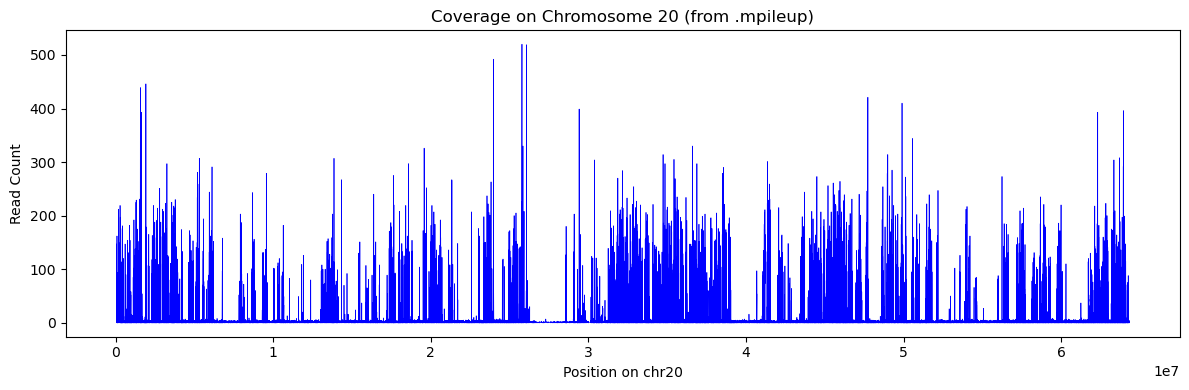

In [37]:
#An awk command can help you create a file with just the information for chr20.
!awk '$1 == "chr20" {print $2 "\t" $4}' ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.mpileup > ~/scratch/Current_Projects/Project_2/VariantCalling/chr20.tsv
import pandas as pd

df = pd.read_csv("~/scratch/Current_Projects/Project_2/VariantCalling/chr20.tsv", sep="\t", header=None, names=["Position", "ReadCount"])
df.head()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(df["Position"], df["ReadCount"], linewidth=0.5, color='blue')
plt.xlabel("Position on chr20")
plt.ylabel("Read Count")
plt.title("Coverage on Chromosome 20 (from .mpileup)")
plt.tight_layout()
plt.show()


# **2.2 Variant calling**
### *Total Questions: 4*
### *Total Points: 4+3+4+4 = 15*


---

<div class="alert alert-block alert-warning">
    <h3>2.2.1 Call the variants (SNPs and Short Indels)</h3>
    <p><b>(i)</b> Write the command used and justify the flags you have used using one sentence.</p>
    <p><b>(ii)</b> Informed decision.</p>
</div>

In [40]:
#Use VarScan for calling variants. Look up the appropriate command for this.\

#For short indels

!varscan mpileup2indel ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.mpileup \
  --min-coverage 10 \
  --min-reads2 3 \
  --min-var-freq 0.2 \
  --p-value 0.05 \
  --strand-filter 1 \
  --output-vcf 1 > ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.indels.vcf

#For SNP's
!varscan mpileup2snp ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.mpileup \
  --min-coverage 10 \
  --min-reads2 3 \
  --min-var-freq 0.2 \
  --p-value 0.05 \
  --strand-filter 1 \
  --output-vcf 1 > ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.snp.vcf




Only indels will be reported
Min coverage:	10
Min reads2:	3
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.05
Reading input from /home/hice1/gmyers30/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.mpileup
356959227 bases in pileup file
60561 variant positions (57162 SNP, 3399 indel)
2203 were failed by the strand-filter
3315 variant positions reported (0 SNP, 3315 indel)
Only SNPs will be reported
Min coverage:	10
Min reads2:	3
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.05
Reading input from /home/hice1/gmyers30/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.mpileup
356959227 bases in pileup file
60561 variant positions (57162 SNP, 3399 indel)
2203 were failed by the strand-filter
55043 variant positions reported (55043 SNP, 0 indel)


#We previously used WES data and are aligning that to hg38

#min coverage 10 : WES can be a bit unreliable and have variable coverage based on how many exons are captured. Settting this to 10 helps avoid those low coverage areas and avoids false calling.
#strand-filter: helps us capture variants that have BOTH forward and backward strands
#min-reads : avoids calling variants with low reads, those are most likely noise
#min-var-freq: in germline WES, variants 50% are heterozygous or 100% homozygous, if its less than 50% it could be error, but 20% is most def error and we need to filter those.

<div class="alert alert-block alert-warning">
    <h3>2.2.2 Select any random variant in your VCF file which lies between the positions 20,800,000 and 30,800,000 on chromosome 16</h3>
    <p><b>Q.</b> What is the average depth of bases for this variant called on chromosome 16</p>
</div>

In [42]:
#Extract this variant. There are multiple ways of doing this. Some fast and some easy.

#extracting only chromsome 16 
#!grep -P '^16\t' ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.snp.vcf > chr16.snps.vcf
#!head -n30800000 ~/scratch/Current_Projects/Project_2/VariantCalling/chr16.snps.vcf | tail -n10000001 

#alternative faster way:
!awk '$1=="chr16" && $2 >= 20800000 && $2 <= 30800000 && !/^#/' ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.snp.vcf | shuf -n 1


chr16	28592072	.	T	C	.	PASS	ADP=20;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:111:20:20:0:20:100%:7.2544E-12:0:32:0:0:14:6


In [ ]:
#The information is there in your VCF file.
#ADP = 20

<div class="alert alert-block alert-warning">
    <h3>2.2.3 How many indels do you have in your VCF file?</p>
</div>

In [44]:
!awk 'BEGIN {count=0} !/^#/ {if(length($4) != length($5)) count++} END {print "Indel count:", count}' ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.indels.vcf


Indel count: 3315


<div class="alert alert-block alert-warning">
    <h3>2.2.4 Select any random variant in your VCF file which lies between the position 203,000,000 and 230,000,000 on chromosome 2.</h3>
    <p><b>(i)</b> What is the variation observed for your 1000 genome individual at this position? Is it 0/0 1/1/ 0/1 or 1/0? How many copies of reference alleles does your individual carry at this position?</p>
    <p><b>(ii)</b> How many read bases (forward and reverse) from your pileup file (as selected by VarScan) supported the alternative allele and how many variants supported the reference allele at this position?</p>
</div>

In [45]:
!awk '$1=="chr2" && $2 >= 203000000 && $2 <= 230000000 && !/^#/' ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.snp.vcf | shuf -n 1


chr2	209921413	.	G	A	.	PASS	ADP=14;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:76:14:14:0:14:100%:2.4927E-8:0:39:0:0:12:2


In [ ]:
#Variation observed and number of copies for reference allele.
##GT is genotype, 1/1 means it is homozygous alternate and there are no copies of the reference allele, the ref is G and alternate is A,

In [46]:
#Number of reads supporting the ref & alt allele.
!awk '$1=="chr2" && $2==209921413' ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.mpileup

#The uppercqases are the forward strand on the alternate allele, most support the alt allele

chr2	209921413	G	14	AAaaAAAAAAAAAA	DIJJJJJJHBJJIJ


# **2.3 Filtering**
### *Total Questions: 1*
### *Total Points: 8*


---

<div class="alert alert-block alert-warning">
    <h3>2.3.1 Extract variants that have average per sample depth of > 50. </h3>
    <p>Show your command and number of variants before and after</p>
</div>

In [8]:
#!cat ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.snp.vcf ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.indels.vcf | grep -v '^#' | sort -k1,1 -k2,2n > ~/scratch/Current_Projects/Project_2/VariantCalling/combined_variants.vcf
!grep '^#' ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.snp.vcf > ~/scratch/Current_Projects/Project_2/VariantCalling/combined_variants.vcf
!cat ~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.snp.vcf \
~/scratch/Current_Projects/Project_2/VariantCalling/SRR715907.indels.vcf \
| grep -v '^#' | sort -k1,1 -k2,2n >> ~/scratch/Current_Projects/Project_2/VariantCalling/combined_variants.vcf

!awk -F'\t' 'BEGIN{OFS="\t"} /^#/ {print; next} {split($9, a, ":"); split($10, b, ":"); for (i=1; i<=length(a); i++) {if (a[i]=="DP" && b[i]>50) print} }' \
~/scratch/Current_Projects/Project_2/VariantCalling/combined_variants.vcf \
> ~/scratch/Current_Projects/Project_2/VariantCalling/variants_DPgt50.vcf

!head ~/scratch/Current_Projects/Project_2/VariantCalling/variants_DPgt50.vcf
!wc -l ~/scratch/Current_Projects/Project_2/VariantCalling/variants_DPgt50.vcf


##fileformat=VCFv4.3
##source=VarScan2
##INFO=<ID=ADP,Number=1,Type=Integer,Description="Average per-sample depth of bases with Phred score >= 15">
##INFO=<ID=WT,Number=1,Type=Integer,Description="Number of samples called reference (wild-type)">
##INFO=<ID=HET,Number=1,Type=Integer,Description="Number of samples called heterozygous-variant">
##INFO=<ID=HOM,Number=1,Type=Integer,Description="Number of samples called homozygous-variant">
##INFO=<ID=NC,Number=1,Type=Integer,Description="Number of samples not called">
##FILTER=<ID=str10,Description="Less than 10% or more than 90% of variant supporting reads on one strand">
##FILTER=<ID=indelError,Description="Likely artifact due to indel reads at this position">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
18005 /home/hice1/gmyers30/scratch/Current_Projects/Project_2/VariantCalling/variants_DPgt50.vcf


In [9]:
#before filtering
!grep -v '^#' ~/scratch/Current_Projects/Project_2/VariantCalling/combined_variants.vcf | wc -l
#after filtering
!grep -v '^#' ~/scratch/Current_Projects/Project_2/VariantCalling/variants_DPgt50.vcf | wc -l


58358
17981


# **3. Comparative Analysis**
### *Total Questions: 3*
### *Total points: 15+13+2 = 30*

---

<div class="alert alert-block alert-warning">
    <h3>3.1 Rerun the above workflow using another tool of your choice</i></h3>
    <p> Briefly explain why you chose the tool </p>
</div>

We are using bwa and minimap2 for comparison. BWA is the gold standard for Illumina short read, slower but highly accurate for SNP/indel calling. Minimap2 is much faster, lighter on memory, and works across short/long reads, but can be slightly less sensitive for very short reads.

In [ ]:
!bwa index -a bwtsw hg38.fa
!bwa mem hg38.fa SRR715907_1.Trimmed.fastq SRR715907_2.Trimmed.fastq > SRR715907.sam
!samtools view -S -b SRR715907.sam | samtools sort -o SRR715907.sorted.bam
!samtools index SRR715907.sorted.bam
!samtools flagstat SRR715907.sorted.bam

<div class="alert alert-block alert-warning">
    <h3>3.2 Compare the results obtained from the original tools used</i></h3>
</div>

Results from minimap2: Total reads: ~ 84.4 million Mapped Reads: ~83.3 million Secondary Alignments: ~27.9 million Supllementary alignments: ~163 Paired-end information: Not reported (all values = 0) because you aligned as single end ont paired end Duplicates : 0

Result from bwa: % mapped: 99.78% Total reads: 58.6 million Properly paired: 98.9% Singletons (only one mate mapped): ~700 Reads mapped to different chromosomes: ~77k (0.1%)

<div class="alert alert-block alert-warning">
    <h3>3.3 On a scale of 1-10, how much did you rely on AI for the project?</i></h3>
    <p> (1 = not at all, 10 = heavily dependent) </p>
</div>

Our groups usage was about a 6!